## 🔹 Step 1: Import Required Libraries
We start by importing the essential libraries for data manipulation, visualization, and modeling.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder


## 🔹 Step 2: Load the Dataset
We load the YouTube channel dataset and take an initial look at its structure.

In [2]:
# Load dataset
df = pd.read_csv("youtube_channel_real_performance_analytics.csv")

In [3]:
df.head()

,ID,Video Duration,Video Publish Time,Days Since Publish,Day,Month,Year,Day of Week,Revenue per 1000 Views (USD),Monetized Playbacks (Estimate),...,Average View Percentage (%),Average View Duration,Views,Watch Time (hours),Subscribers,Estimated Revenue (USD),Impressions,Video Thumbnail CTR (%),Revenue per View,Engagement Rate
0,0,201.0,2016-06-02,0,2,6,2016,4,0.024,723.0,...,40.38,81.0,23531.0,533.1636,51.0,0.561,41118.0,27.66,0.000024,4.364455
1,1,391.0,2016-06-10,8,10,6,2016,0,0.056,727.0,...,39.85,156.0,11478.0,500.5628,33.0,0.648,41627.0,5.85,0.000056,3.153860
2,2,133.0,2016-06-14,4,14,6,2016,5,0.014,76.0,...,30.88,41.0,6153.0,70.7287,8.0,0.089,38713.0,7.07,0.000014,3.949293
3,3,14.0,2016-06-29,15,29,6,2016,6,0.004,18.0,...,103.05,14.0,4398.0,17.6251,2.0,0.017,35245.0,5.60,0.000004,5.434288
4,4,45.0,2016-07-01,2,1,7,2016,0,0.000,0.0,...,55.70,25.0,14659.0,104.3341,28.0,0.000,46218.0,8.62,0.000000,4.495532


## 🔹 Step 3: Data Overview
We check:
- Shape of the dataset
- Column names and data types
- Missing values


In [4]:
# Basic info
print("Shape:", df.shape)
print("Total missing values:", df.isnull().sum().sum())


Shape: (364, 72)
Total missing values: 0


In [5]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 72 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  364 non-null    int64  
 1   Video Duration                      364 non-null    float64
 2   Video Publish Time                  364 non-null    object 
 3   Days Since Publish                  364 non-null    int64  
 4   Day                                 364 non-null    int64  
 5   Month                               364 non-null    int64  
 6   Year                                364 non-null    int64  
 7   Day of Week                         364 non-null    int64  
 8   Revenue per 1000 Views (USD)        364 non-null    float64
 9   Monetized Playbacks (Estimate)      364 non-null    float64
 10  Playback-Based CPM (USD)            364 non-null    float64
 11  CPM (USD)                           364 non-n

## 🔹 Step 4: Data Preprocessing
We ensure the dataset is clean and ready:
1. Convert `Video Publish Time` to datetime.
2. Encode categorical columns (`Day of Week`).
3. Create new features like Revenue per View and Engagement Rate.


In [6]:
# Convert publish time
df['Video Publish Time'] = pd.to_datetime(df['Video Publish Time'])

# Check nulls
print(df.isnull().sum().sum())  # total missing values


0


In [7]:
# ✅ Step: Preprocessing

# Convert Video Publish Time to datetime
df['Video Publish Time'] = pd.to_datetime(df['Video Publish Time'])

# Encode Day of Week
df['Day of Week'] = LabelEncoder().fit_transform(df['Day of Week'])

# Feature engineering
df['Revenue per View'] = df['Estimated Revenue (USD)'] / df['Views'].replace(0, np.nan)
df['Engagement Rate'] = ((df['Likes'] + df['Shares'] + df['New Comments']) / df['Views'].replace(0, np.nan)) * 100

# Fill any NaN values created by division
df[['Revenue per View','Engagement Rate']] = df[['Revenue per View','Engagement Rate']].fillna(0)

df.head()


,ID,Video Duration,Video Publish Time,Days Since Publish,Day,Month,Year,Day of Week,Revenue per 1000 Views (USD),Monetized Playbacks (Estimate),...,Average View Percentage (%),Average View Duration,Views,Watch Time (hours),Subscribers,Estimated Revenue (USD),Impressions,Video Thumbnail CTR (%),Revenue per View,Engagement Rate
0,0,201.0,2016-06-02,0,2,6,2016,4,0.024,723.0,...,40.38,81.0,23531.0,533.1636,51.0,0.561,41118.0,27.66,0.000024,4.364455
1,1,391.0,2016-06-10,8,10,6,2016,0,0.056,727.0,...,39.85,156.0,11478.0,500.5628,33.0,0.648,41627.0,5.85,0.000056,3.153860
2,2,133.0,2016-06-14,4,14,6,2016,5,0.014,76.0,...,30.88,41.0,6153.0,70.7287,8.0,0.089,38713.0,7.07,0.000014,3.949293
3,3,14.0,2016-06-29,15,29,6,2016,6,0.004,18.0,...,103.05,14.0,4398.0,17.6251,2.0,0.017,35245.0,5.60,0.000004,5.434288
4,4,45.0,2016-07-01,2,1,7,2016,0,0.000,0.0,...,55.70,25.0,14659.0,104.3341,28.0,0.000,46218.0,8.62,0.000000,4.495532


## Step 5: Exploratory Data Analysis

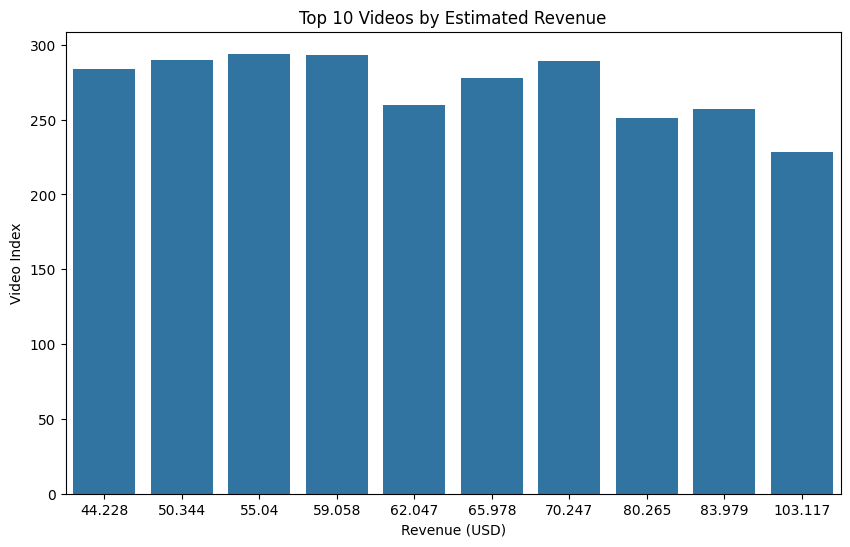

In [8]:
top_videos = df.sort_values(by="Estimated Revenue (USD)", ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x="Estimated Revenue (USD)", y=top_videos.index, data=top_videos)
plt.title("Top 10 Videos by Estimated Revenue")
plt.xlabel("Revenue (USD)")
plt.ylabel("Video Index")
plt.show()


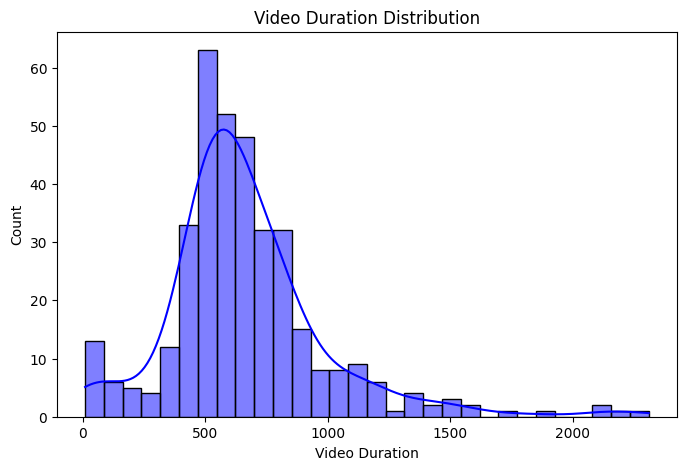

In [9]:
# Distribution of Video Duration
plt.figure(figsize=(8,5))
sns.histplot(df['Video Duration'], bins=30, kde=True, color='blue')
plt.title("Video Duration Distribution")
plt.show()




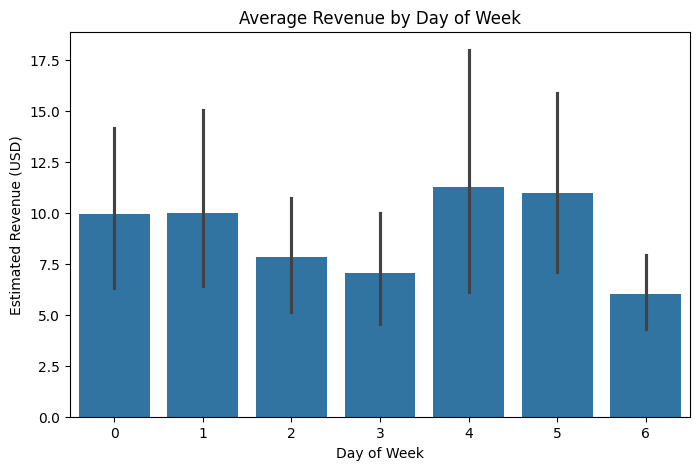

In [10]:
plt.figure(figsize=(8,5))
sns.barplot(x="Day of Week", y="Estimated Revenue (USD)", data=df)
plt.title("Average Revenue by Day of Week")
plt.show()


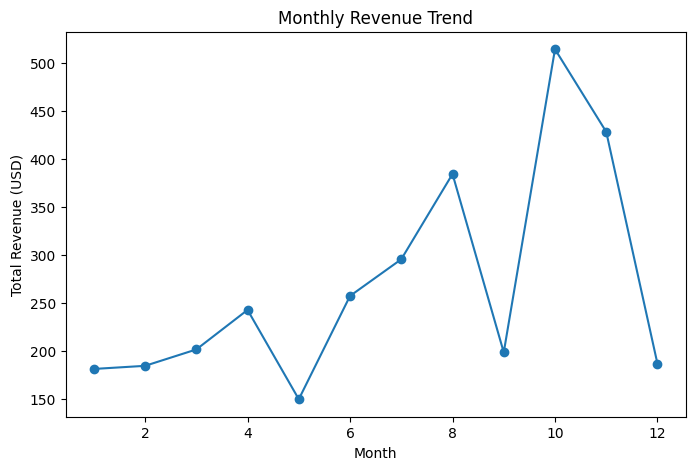

In [11]:
df['Month'] = df['Video Publish Time'].dt.month
monthly_revenue = df.groupby('Month')['Estimated Revenue (USD)'].sum()

plt.figure(figsize=(8,5))
monthly_revenue.plot(kind='line', marker='o')
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Total Revenue (USD)")
plt.show()


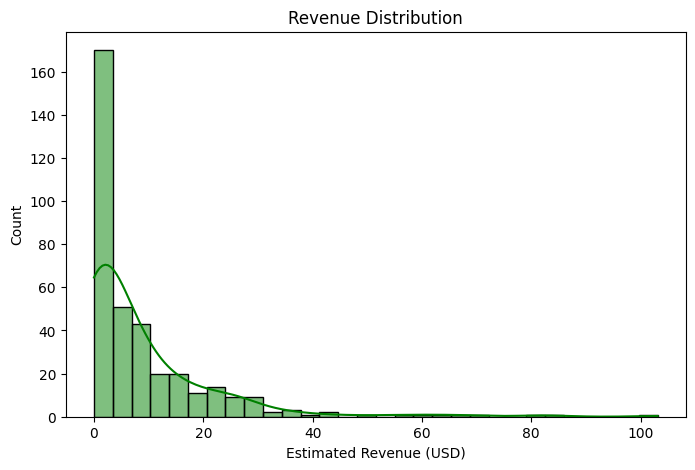

In [12]:
# Revenue Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Estimated Revenue (USD)'], bins=30, kde=True, color='green')
plt.title("Revenue Distribution")
plt.show()

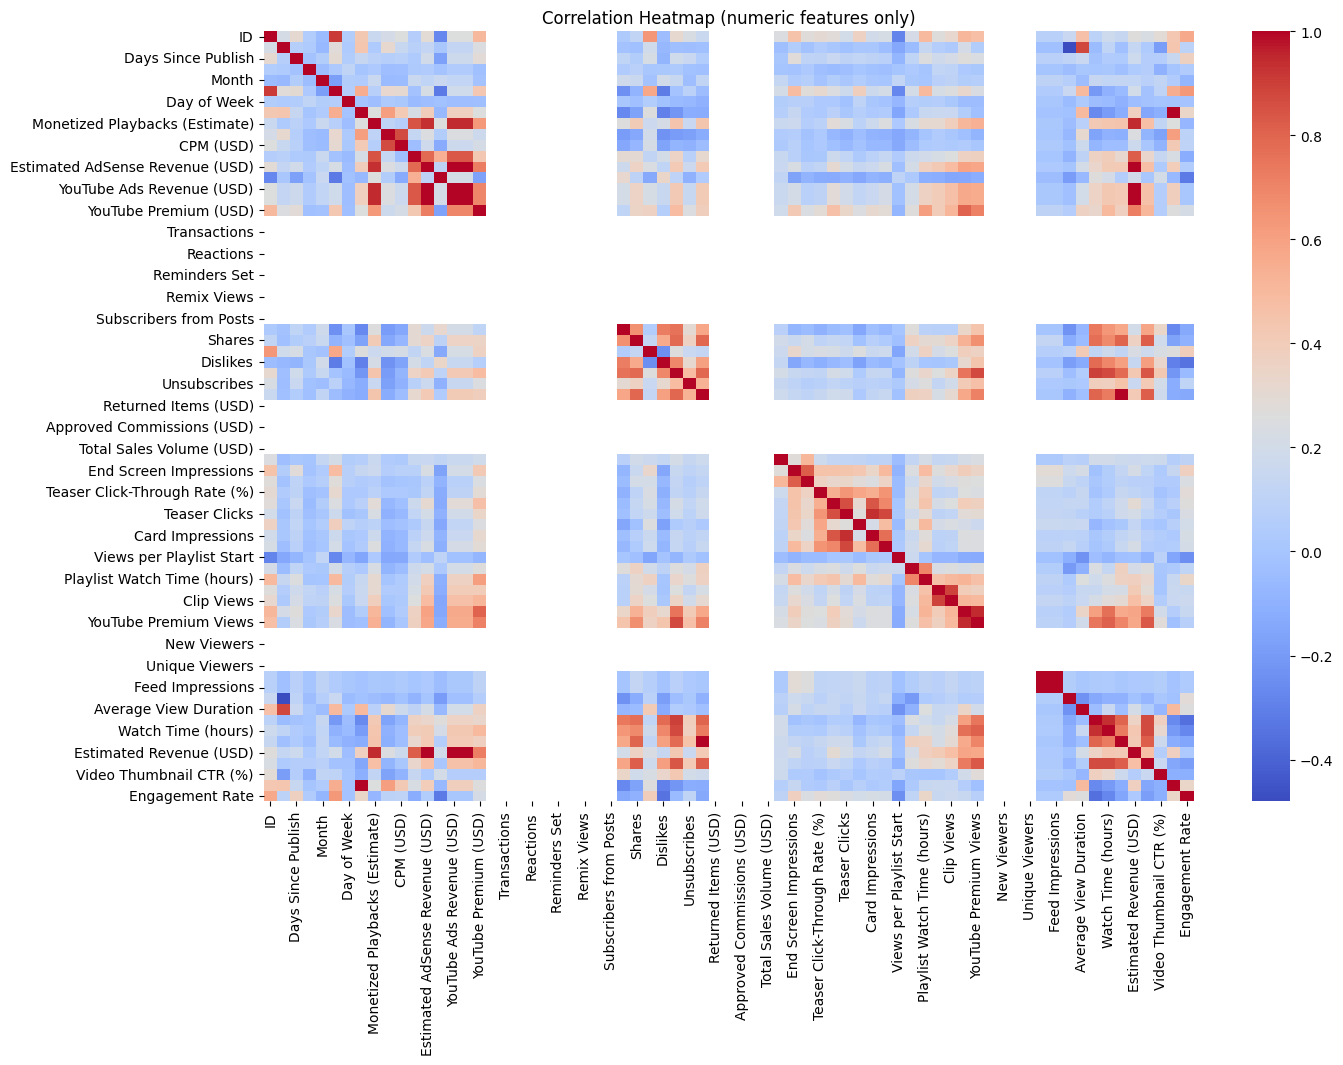

In [13]:
# ✅ Fix: Only numeric columns
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(15,10))
sns.heatmap(numeric_df.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap (numeric features only)")
plt.show()



In [14]:
# Revenue per View
df['Revenue per View'] = df['Estimated Revenue (USD)'] / df['Views']

# Engagement Rate
df['Engagement Rate'] = (df['Likes'] + df['Shares'] + df['New Comments']) / df['Views'] * 100
df['Engagement Rate'] = df['Engagement Rate'].fillna(0)  # Handle division by zero


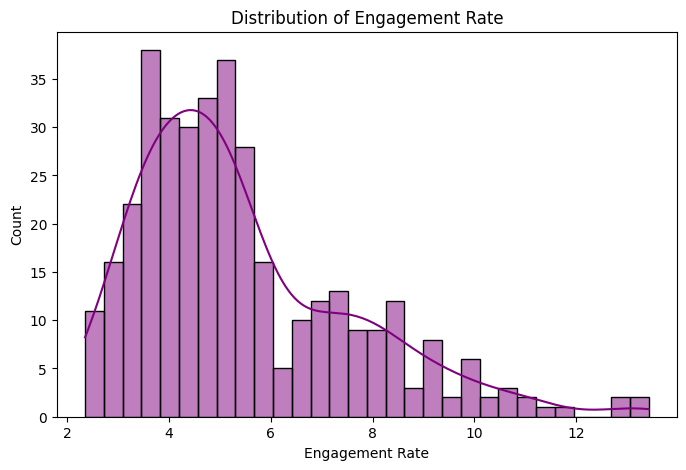

In [15]:
plt.figure(figsize=(8,5))
sns.histplot(df['Engagement Rate'], bins=30, kde=True, color='purple')
plt.title("Distribution of Engagement Rate")
plt.show()


## Step 6: Predictive Modeling
We build a Random Forest model to predict `Estimated Revenue (USD)` using key features:
- Views, Subscribers, Likes, Shares, New Comments, Engagement Rate
We evaluate which features most strongly drive revenue.



In [16]:
# Select Features
features = ['Views','Subscribers','Likes','Shares','New Comments','Engagement Rate','Revenue per View']
target = 'Estimated Revenue (USD)'

X = df[features]
y = df[target]



In [17]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [18]:
# Train Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)



RandomForestRegressor(random_state=42)

In [19]:
# Predictions
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse:.2f}, R²: {r2:.2f}")


MSE: 5.38, R²: 0.94


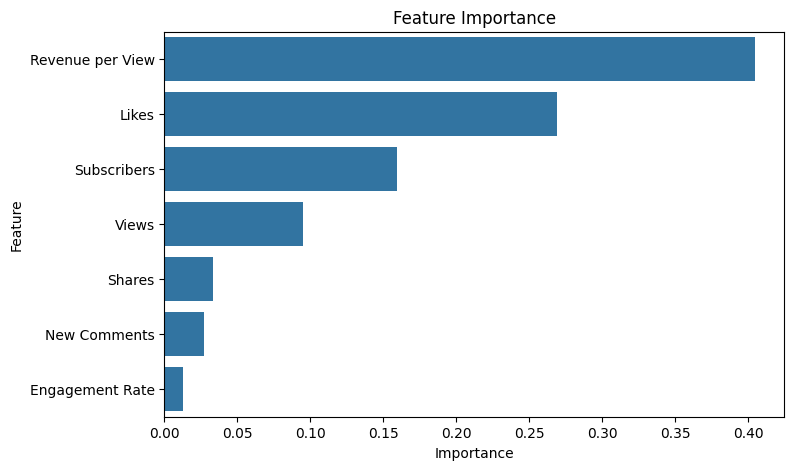

In [20]:
importances = model.feature_importances_
feat_imp = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=feat_imp)
plt.title("Feature Importance")
plt.show()


## Step 8: Insights & Recommendations

- Revenue is primarily driven by **Views and Subscribers**.
- Engagement metrics (Likes, Shares, Comments) also play a role.
- **Engagement Rate** is a good derived metric for performance.
- Use these insights to design dashboards highlighting:
  - Total Revenue Trends
  - Top Performing Videos
  - Engagement Drivers
  - Audience Growth (Subscribers, Returning vs New Viewers)

In [22]:
# Save the cleaned dataset
df.to_csv("youtube_clean.csv", index=False)
print("Cleaned dataset exported successfully as youtube_clean.csv")


Cleaned dataset exported successfully as youtube_clean.csv
